In [1]:

import numpy as np

import scipy as scipy
from scipy import interpolate
from scipy.fft import fft, ifft

import matplotlib.pyplot as plt
import math

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

import polarTransform

from marvin.tools import Maps

from tqdm import tqdm

import Bicone_Classifier


[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


In [2]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

In [20]:

maps = Maps('7815-6104', bintype='SPX', template='MILESHC-MASTARSSP')
oiii_ew = maps.emline_gew_oiii_5008.value

# Ellipticity Properties
r = maps.spx_ellcoo_elliptical_radius.value.round(decimals=2)
phi = maps.spx_ellcoo_elliptical_azimuth.value.round(decimals=2)
r_re = maps.spx_ellcoo_r_re.value


In [21]:
# We select the ring of r = 0.8 er ~ 1.2 er for EW
# Make a new array of (EW, phi_er)
ew_r_comb = np.array((oiii_ew, r_re)) 
#Tanspose the array to make each element in form of (EW, phi_er)


In [22]:
# Make out of range data = 0, then output the EW only
for i in  ew_r_comb.T :
    for j in i:
        if j[1] < 0.9 or j[1] > 1.1:
            j[0] = 0
        else:
            pass

# Output: zeros except for Ring of EW

In [23]:
# Actually we only cares about the EW distribution along the phi direction
# So we 
# 1. make a tuple in the format of (phi, EW).
# 2. delete 0 EW elements.
# 3. Interpolate the phi vs. EW to 500
# 4. make the curve EW curve plot


phi_EW = np.array((phi, ew_r_comb[0]))

EW_stacked = []
for i in phi_EW.T:
    for j in i:
        if j[1] != 0:
            EW_stacked.append(j)
        else:
            pass
    
EW_curve = np.array(EW_stacked)


In [24]:
# Sort the EW along phi direction
EW_sort = EW_curve[EW_curve[:, 0].argsort()]
SMO = scipy.ndimage.gaussian_filter(EW_sort.T[1], sigma = 1)

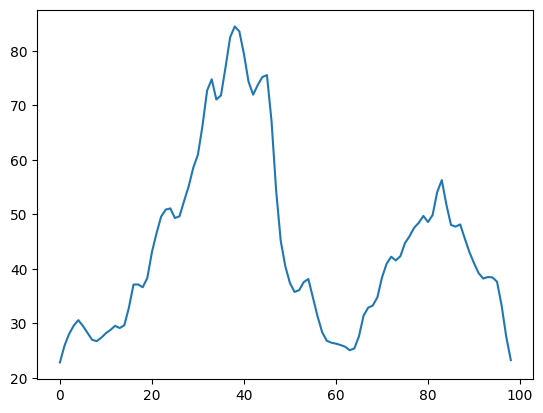

In [25]:
plt.plot(SMO)
plt.show()

# Deploy the pipeline and test

### Plot the curve

7958-9101
7972-3704
8138-6101
8252-9101
8465-12704
8486-12705
8715-6103
8718-12702
9031-12704
9867-9102
10502-12701
10517-3701
10518-3704
11826-6103
11958-3703
12673-6101
12700-6101


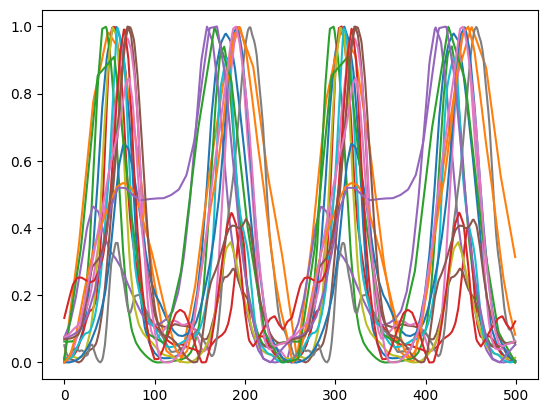

In [2]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu:
        # Load OIII MAPS from SDSS-MARVIN server
        curve = Bicone_Classifier.ellip_ring_ew(data, cycle=2)
        plt.plot(curve[0])
        print(curve[1])
        
plt.show()

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits' mode='rb' closefd=True> (ResourceWarning)


7975-9102
7975-12705
7990-1901
7990-12701
8082-3704
8131-12703
8083-6103
8083-3704
8083-12701
8083-12705
8083-3703
8138-6101
8138-6104
8138-6102
8138-6103
8138-3703
8138-12702
8138-12705
8081-1901
8081-3704


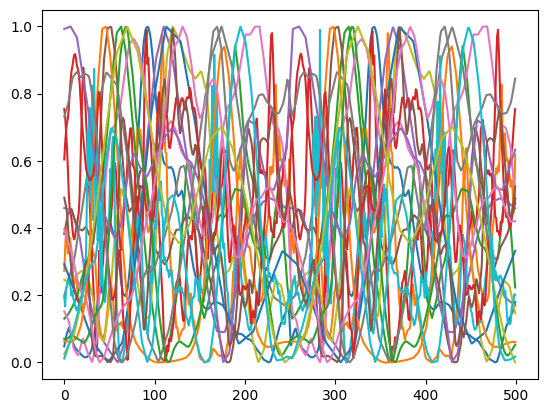

In [3]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v3.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

#fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

for data in plateifu[20:40]:
        # Load OIII MAPS from SDSS-MARVIN server
        curve = Bicone_Classifier.ellip_ring_ew(data, in_r = 1.1, out_r = 1.3, cycle=2)

        plt.plot(curve[0])
        print(curve[1])
        
plt.show()

### Plot the FT

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v3.fits' mode='rb' closefd=True> (ResourceWarning)


7958-9101 3 104.27959612540678


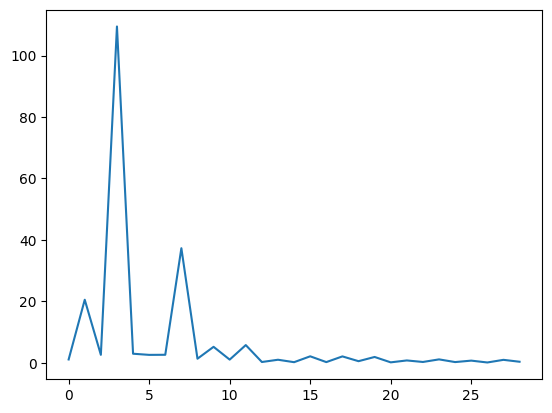

7972-3704 3 88.23560036131964


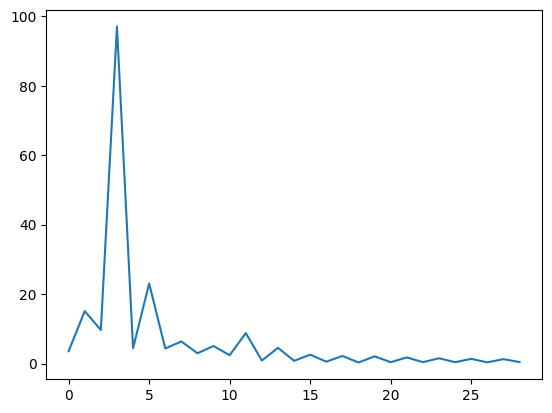

8138-6101 3 58.865706384464495


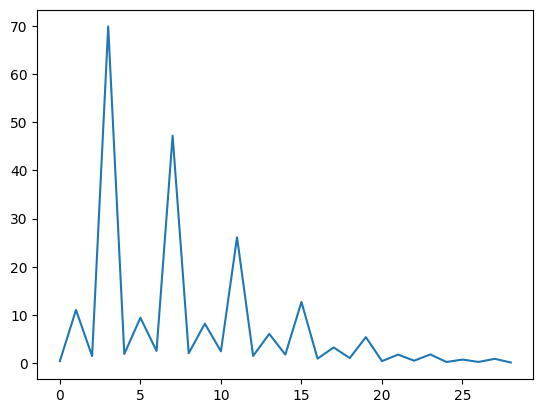

8252-9101 3 36.914354947411866


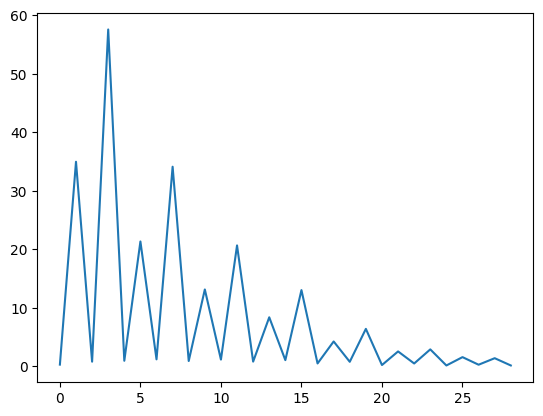

8465-12704 3 74.12191169747487


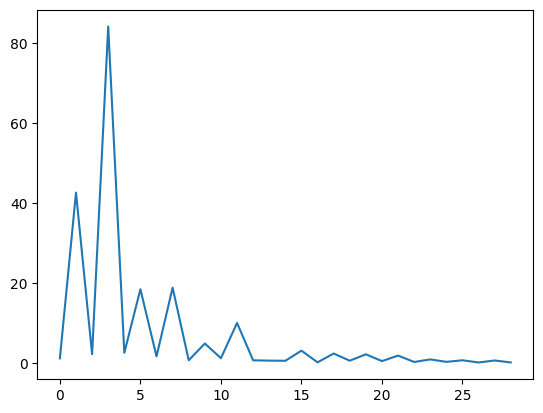

8486-12705 3 44.91389624063707


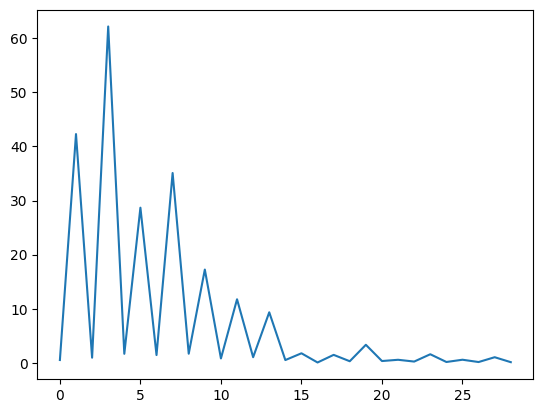

8715-6103 3 77.72135114435076


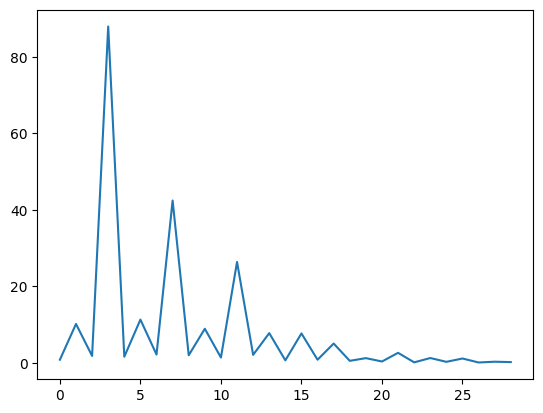

8718-12702 3 50.57117582162912


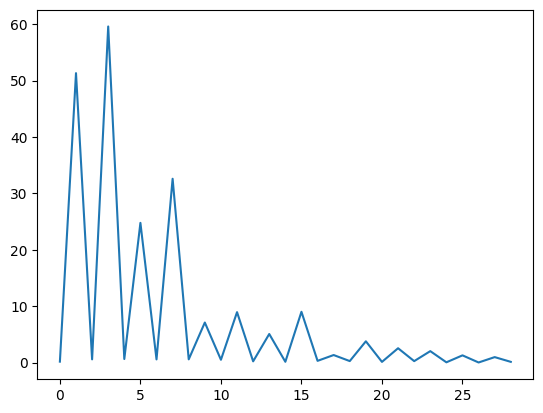

9031-12704 3 34.197764127597246


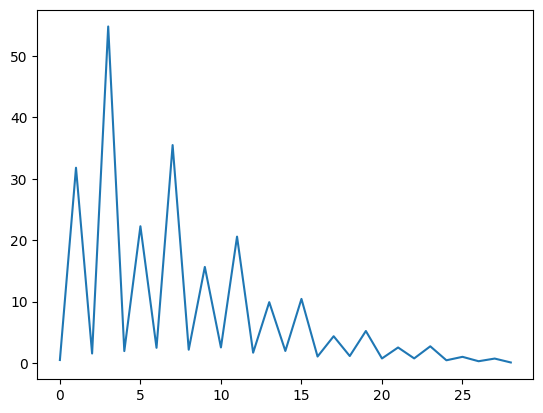

9867-9102 3 54.882337341440284


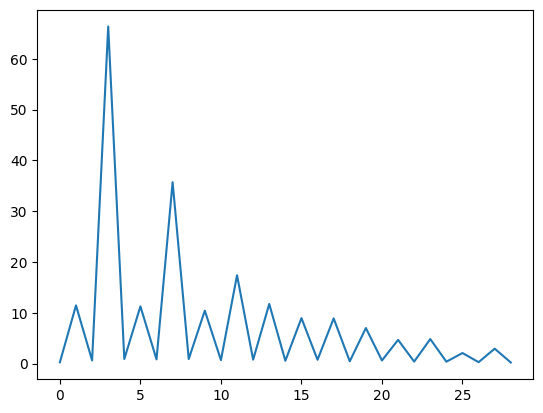

10502-12701 3 75.42791360276028


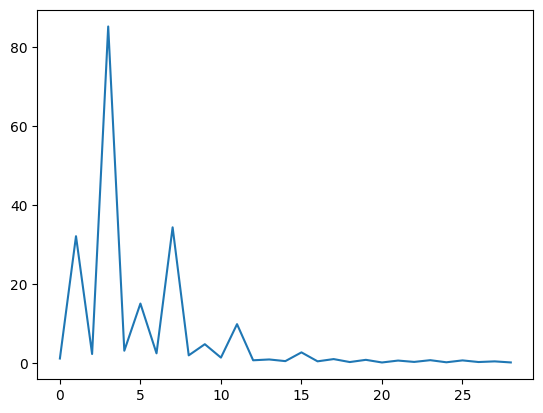

10517-3701 3 92.55060410694264


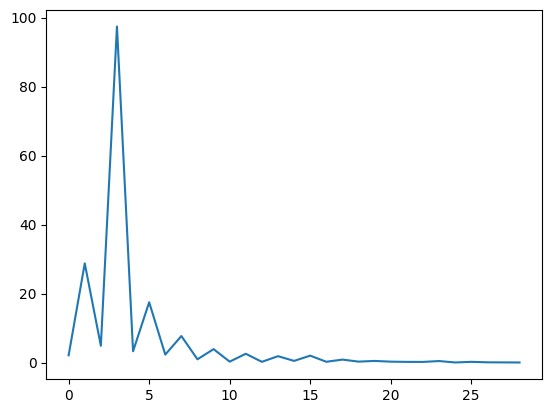

10518-3704 3 67.13720070532166


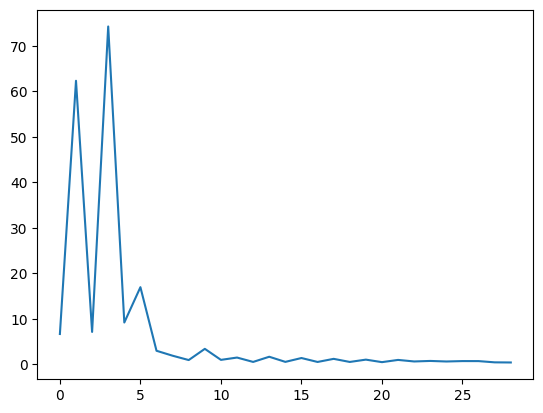

11826-6103 3 33.46003389365686


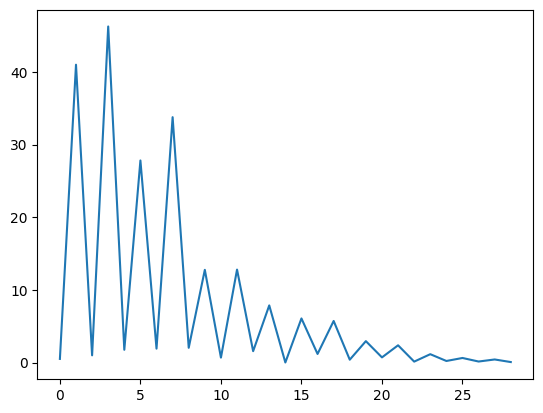

11958-3703 3 62.710650124857615


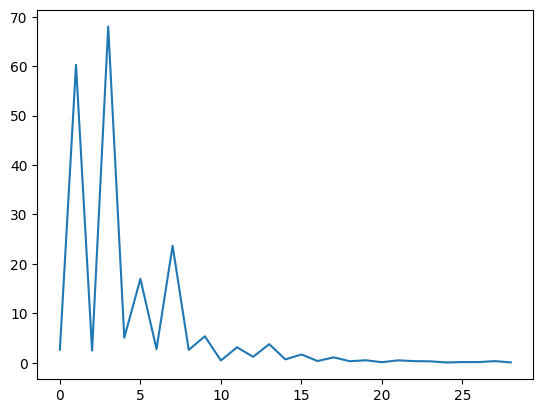

12673-6101 3 48.55609911431168


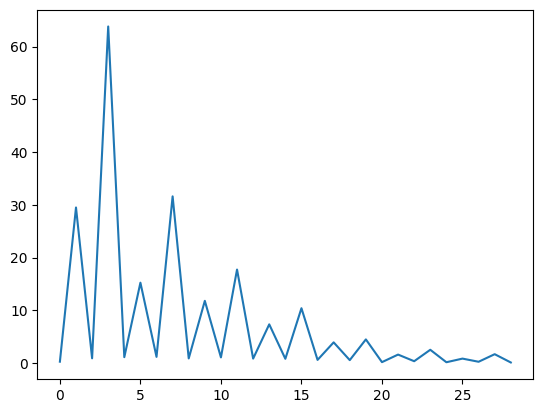

12700-6101 3 105.30834559297413


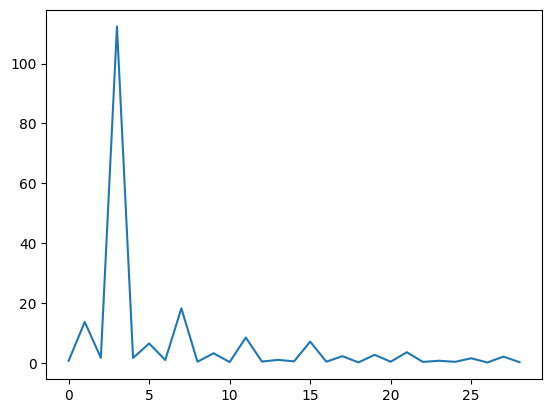

In [18]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu:
        # Load OIII MAPS from SDSS-MARVIN server
        curve = Bicone_Classifier.ellip_ring_ew(data, in_r = 1.1, out_r = 1.3, cycle=2)[0]
        yf = np.abs(fft(curve))[1:30]
        peak_value = max(yf)
        peak_index = list(yf).index(peak_value)
        plt.plot(yf)
        yf.sort()
        loss = sum(np.diff(yf[-5:]))
        print(data, peak_index, loss)
        plt.show()

        


[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v3.fits' mode='rb' closefd=True> (ResourceWarning)


8247-1901 3 60.87687618339024


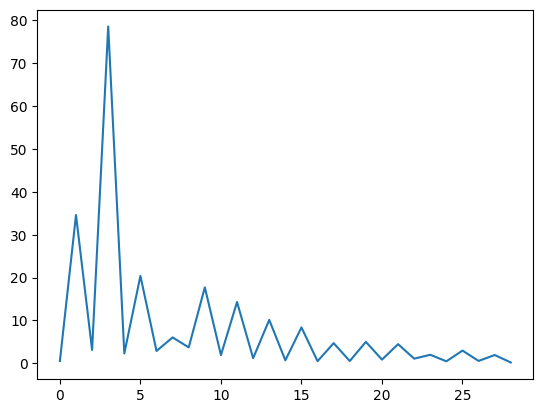

8137-12701 3 77.45405961954415


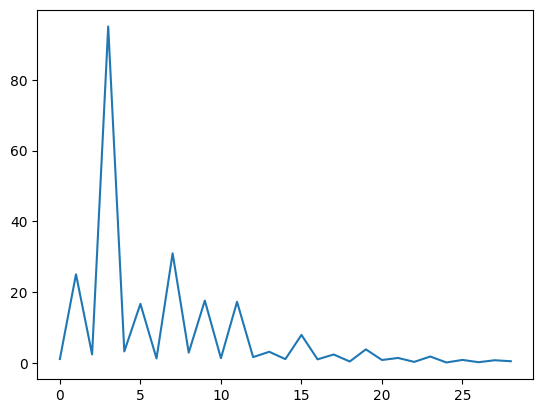

8137-3702 3 62.62114050066223


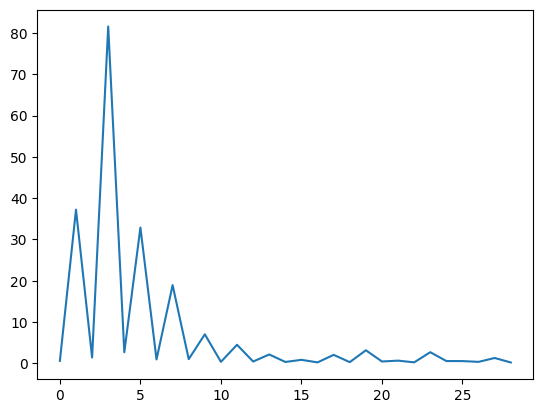

8135-9102 3 30.592962315401472


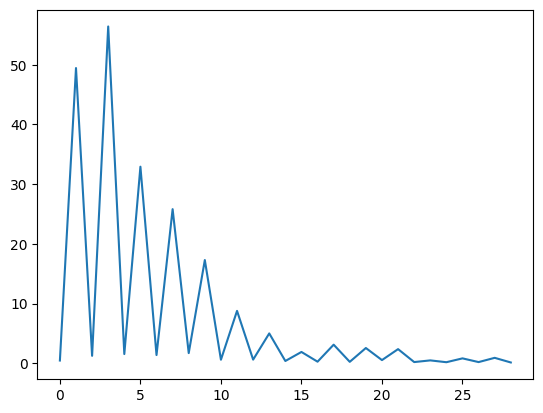

8135-3704 3 35.07781425073544


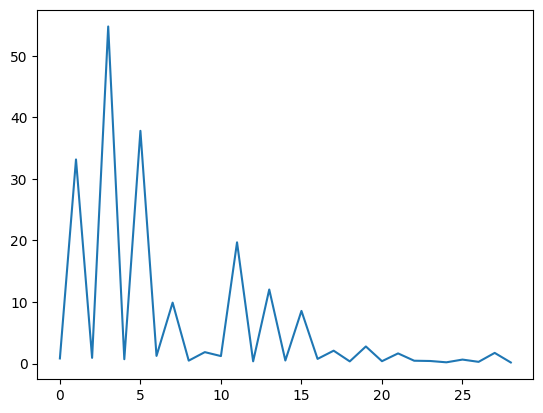

8135-6104 3 27.361937471179793


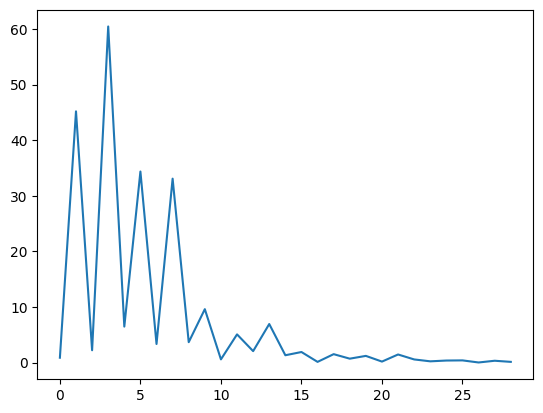

8250-1902 3 70.19790730030921


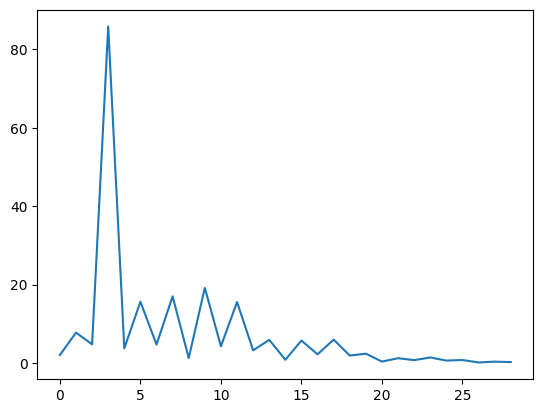

8250-6104 3 64.76347353144241


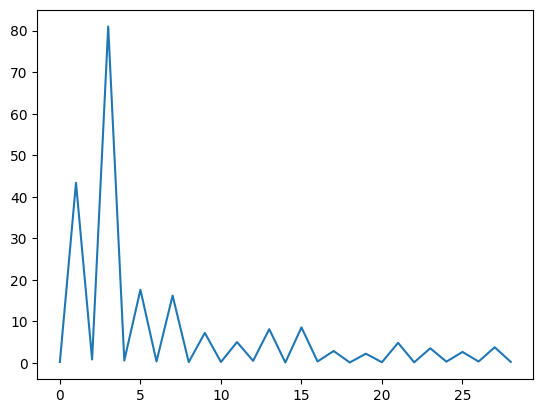

8141-6102 3 64.25981736985587


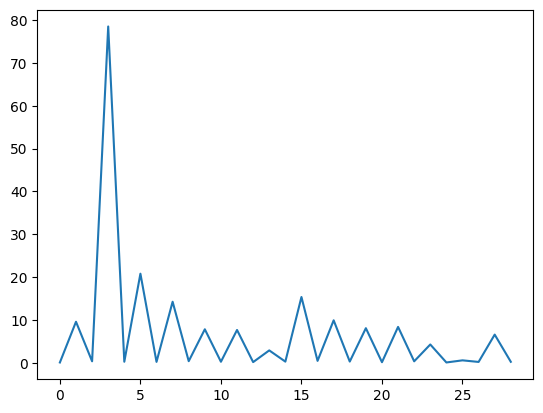

8141-12705 3 41.75717106428176


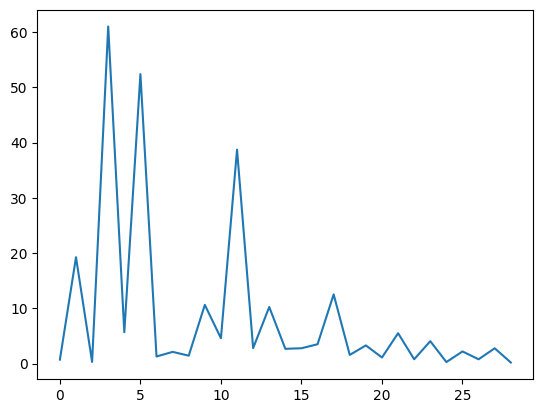

8253-12701 3 35.80046194731011


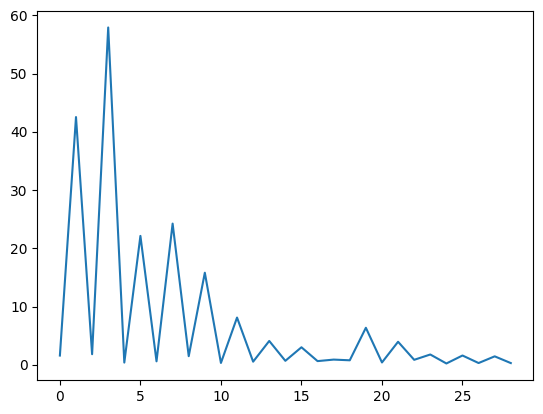

8253-3702 3 78.37427523653804


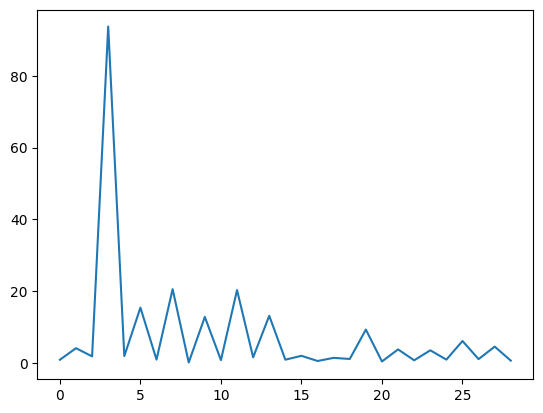

8253-3704 3 40.375949272463714


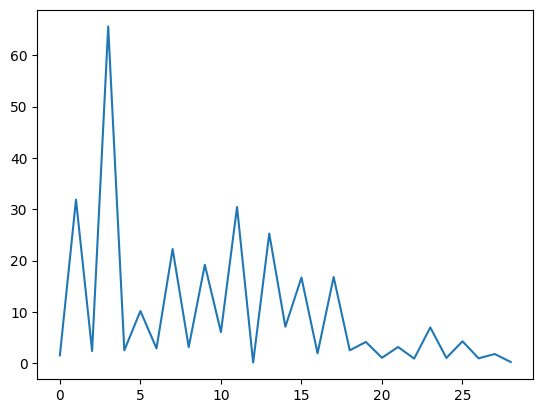

8256-6104 3 38.3766927456611


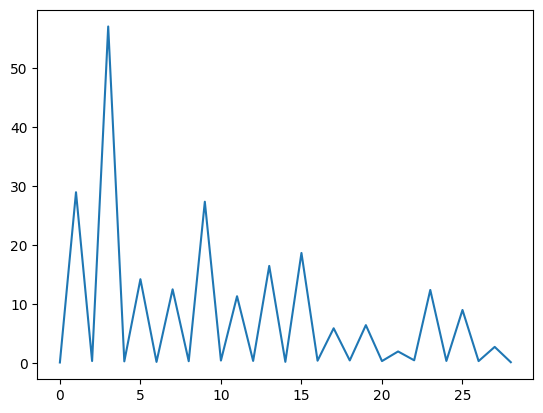

8143-9101 3 52.9533761345827


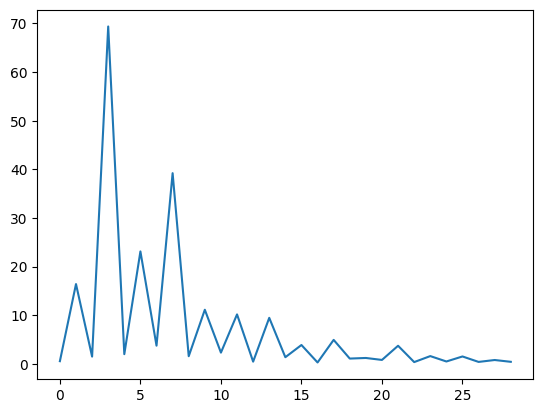

8143-1901 3 51.750184332685855


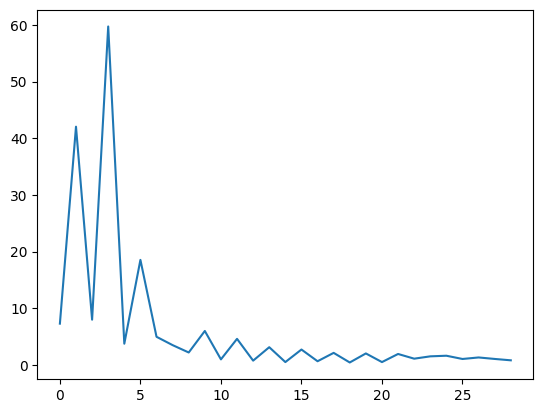

8274-6104 3 32.57901074479635


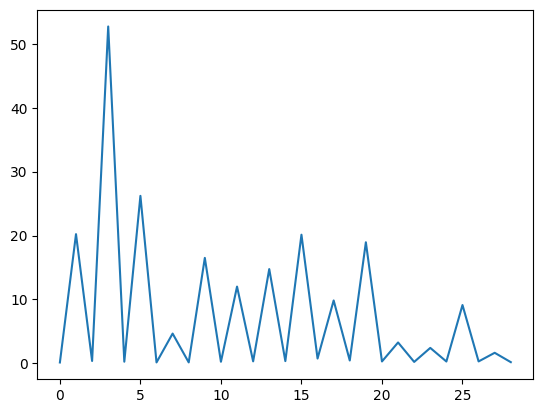

8249-12701 3 68.6652054892127


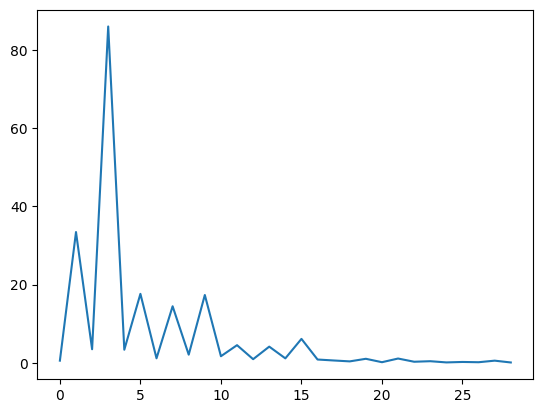

8258-1901 3 91.82328246672435


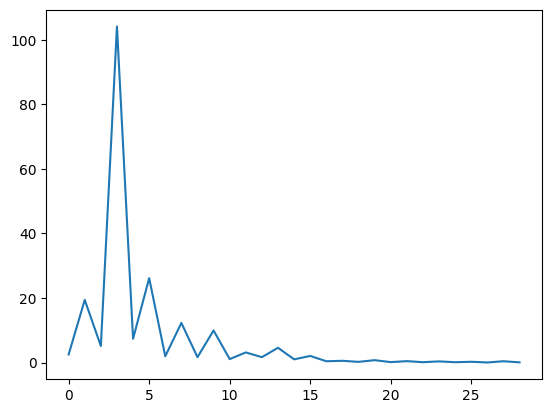

8252-9101 3 36.240247933679115


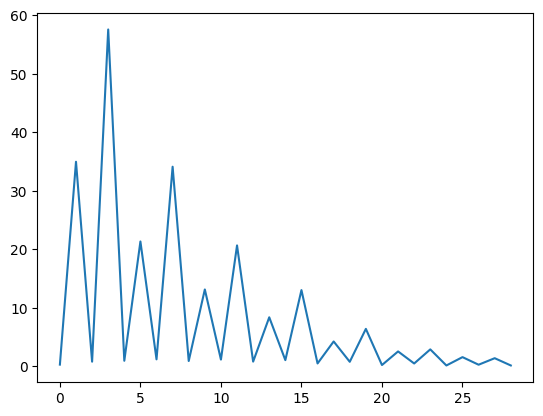

In [27]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v4.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

#fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

for data in plateifu[20:40]:
        # Load OIII MAPS from SDSS-MARVIN server
        curve = Bicone_Classifier.ellip_ring_ew(data, in_r = 1.1, out_r = 1.3, cycle=2)[0]
        yf = np.abs(fft(curve))[1:30]
        peak_value = max(yf)
        peak_index = list(yf).index(peak_value)
        plt.plot(yf)
        yf.sort()
        loss = sum(np.diff(yf[-4:]))
        print(data, peak_index, loss)
        plt.show()